# Find Similar Neighborhood: Data Analysis

Data analysis report of the C9-Capstone final project, Find Similar Neighborhood for Takumen restaurant owners. 

## I. Import Data

In [46]:
import pandas as pd
import numpy as np

!pip install beautifulsoup4
from bs4 import BeautifulSoup as bs
import requests

print('Ready to rock!')

Ready to rock!


In [47]:
#Request rent data from webpage

request=requests.get('https://www.cityrealty.com/nyc/market-insight/features/get-to-know/map-average-nyc-rent-prices-february-2019/26722')

soup=bs(request.content, 'lxml')
table=soup.find_all('table')

t1=pd.read_html(str(table))[0]
t2=pd.read_html(str(table))[1]
t3=pd.read_html(str(table))[2]
t4=pd.read_html(str(table))[3]
t5=pd.read_html(str(table))[4]
t6=pd.read_html(str(table))[5]
t7=pd.read_html(str(table))[6]
t8=pd.read_html(str(table))[7]


In [48]:
#Check out the tables

t1.head()

,Neighbordhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Chelsea,"$3,329 (-.6%)","$4,342 (-3.49%)","$7,392 (-3.02%)","$13,708 (-8.69%)"
1,East Village,"$2,984 (+9.26%)","$3,473 (-3.91%)","$4,590 (-2.37%)","$6,430 (+8.52%)"
2,Flatiron/Union Square,"$6,904 (+23.62%)","$5,535 (+8.02%)","$9,503 (-10.71%)","$17,492 (-.05%)"
3,Gramercy Park,"$2,682 (-2.54%)","$3,687 (-.78%)","$5,365 (-9.69%)","$9,038 (+11.32%)"
4,Greenwich Village,"$3,089 (-4.05%)","$4,398 (-2.37%)","$7,928 (+4.45%)","$12,081 (-11.7%)"


In [49]:
t2.head()

,Neighbordhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Beekman/Sutton Place,"$2,680 (+.19%)","$3,634 (-3.9%)","$5,335 (-2.82%)","$10,950 (+20.4%)"
1,Midtown East,"$4,756 (-6.44%)","$3,941 (-.93%)","$6,624 (-10.06%)","$23,526 (+7.48%)"
2,Midtown West,"$3,282 (-2.22%)","$4,141 (+3.42%)","$6,648 (+5.16%)","$8,566 (+3.94%)"
3,Murray Hill,"$3,353 (+3.45%)","$3,722 (-3.12%)","$5,226 (-4.87%)","$8,130 (+8.77%)"
4,Turtle Bay/United Nations,"$3,452 (+1.34%)","$3,559 (-4.27%)","$6,193 (-.66%)","$28,000 (.%)"


In [50]:
t3.head()

,Neighbordhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Broadway Corridor,"$2,568 (-2.76%)","$3,342 (-.49%)","$4,689 (-1.24%)","$8,071 (-21.4%)"
1,Central Park West,"$2,875 (-6.17%)","$3,417 (-1.64%)","$7,944 (+5.26%)","$16,427 (-.79%)"
2,Lincoln Center,"$3,272 (-.5%)","$3,978 (-1.6%)","$7,211 (+3.05%)","$9,302 (-3.61%)"
3,Morningside Heights,"$2,535 (-10.04%)","$3,670 (-.93%)","$3,267 (+5.41%)","$4,229 (+11.1%)"
4,Riverside Dr./West End Ave.,"$2,607 (+1.61%)","$3,411 (-4.18%)","$5,837 (+4.27%)","$9,221 (-.02%)"


In [51]:
print(t4.shape)
print(t5.shape)
print(t6.shape)
print(t7.shape)
print(t8.shape)

(5, 5)
(2, 5)
(5, 5)
(11, 5)
(10, 5)


In [52]:
#Combine t1 to t6, add Column 'Borough'
manhattan_rent=pd.concat((t1, t2, t3, t4, t5, t6), ignore_index=True)
manhattan_rent['Borough']='Manhattan'
manhattan_rent.rename(columns={'Neighbordhood':'Neighborhood'}, inplace=True)
manhattan_rent=manhattan_rent[['Borough','Neighborhood','Studios','1 Bedrooms','2 Bedrooms','3 Bedrooms']]

manhattan_rent.head()

,Borough,Neighborhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Manhattan,Chelsea,"$3,329 (-.6%)","$4,342 (-3.49%)","$7,392 (-3.02%)","$13,708 (-8.69%)"
1,Manhattan,East Village,"$2,984 (+9.26%)","$3,473 (-3.91%)","$4,590 (-2.37%)","$6,430 (+8.52%)"
2,Manhattan,Flatiron/Union Square,"$6,904 (+23.62%)","$5,535 (+8.02%)","$9,503 (-10.71%)","$17,492 (-.05%)"
3,Manhattan,Gramercy Park,"$2,682 (-2.54%)","$3,687 (-.78%)","$5,365 (-9.69%)","$9,038 (+11.32%)"
4,Manhattan,Greenwich Village,"$3,089 (-4.05%)","$4,398 (-2.37%)","$7,928 (+4.45%)","$12,081 (-11.7%)"


In [53]:
print(manhattan_rent.shape)

(34, 6)


In [54]:
#Combine t7 and t8, add Column 'Borough'
brooklyn_rent=pd.concat((t7, t8), ignore_index=True)
brooklyn_rent['Borough']='Brooklyn'
brooklyn_rent.rename(columns={'Neighbordhood':'Neighborhood'}, inplace=True)
brooklyn_rent=brooklyn_rent[['Borough','Neighborhood','Studios','1 Bedrooms','2 Bedrooms','3 Bedrooms']]

print(brooklyn_rent.shape)
brooklyn_rent.head()

(21, 6)


,Borough,Neighborhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Brooklyn,Bedford-Stuyvesant,"$1,700 (+13.33%)","$2,229 (+3.9%)","$2,577 (+5.52%)","$2,867 (-1.89%)"
1,Brooklyn,Boerum Hill,"$2,392 (-8.68%)","$2,935 (+4.06%)","$4,502 (+3.%)","$4,963 (-15.45%)"
2,Brooklyn,Brooklyn Heights,"$2,764 (+.61%)","$3,296 (+3.01%)","$6,373 (+2.65%)","$9,331 (+.5%)"
3,Brooklyn,Bushwick,"$2,262 (-12.21%)","$2,141 (-1.76%)","$2,452 (+.1%)","$2,718 (+2.22%)"
4,Brooklyn,Carroll Gardens,-,"$2,678 (-.5%)","$3,674 (-2.96%)","$4,044 (-4.3%)"


In [55]:
df_rent=pd.concat((manhattan_rent, brooklyn_rent), ignore_index=True)

print(df_rent.shape)
df_rent.head()

(55, 6)


,Borough,Neighborhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms
0,Manhattan,Chelsea,"$3,329 (-.6%)","$4,342 (-3.49%)","$7,392 (-3.02%)","$13,708 (-8.69%)"
1,Manhattan,East Village,"$2,984 (+9.26%)","$3,473 (-3.91%)","$4,590 (-2.37%)","$6,430 (+8.52%)"
2,Manhattan,Flatiron/Union Square,"$6,904 (+23.62%)","$5,535 (+8.02%)","$9,503 (-10.71%)","$17,492 (-.05%)"
3,Manhattan,Gramercy Park,"$2,682 (-2.54%)","$3,687 (-.78%)","$5,365 (-9.69%)","$9,038 (+11.32%)"
4,Manhattan,Greenwich Village,"$3,089 (-4.05%)","$4,398 (-2.37%)","$7,928 (+4.45%)","$12,081 (-11.7%)"


## II. Data Preparation

### 1. Clean Rent Data


#### Only keep dollar number in df_rent, and normalize the data

In [56]:
df_rent=df_rent.replace(',', '', regex=True)
df_rent['Studio'] = df_rent.Studios.str.extract('(\d\d\d\d)')
df_rent['1B'] = df_rent['1 Bedrooms'].str.extract('(\d\d\d\d)')
df_rent['2B'] = df_rent['2 Bedrooms'].str.extract('(\d\d\d\d)')
df_rent['3B'] = df_rent['3 Bedrooms'].str.extract('(\d\d\d\d\d)')
df_rent.head()

,Borough,Neighborhood,Studios,1 Bedrooms,2 Bedrooms,3 Bedrooms,Studio,1B,2B,3B
0,Manhattan,Chelsea,$3329 (-.6%),$4342 (-3.49%),$7392 (-3.02%),$13708 (-8.69%),3329,4342,7392,13708
1,Manhattan,East Village,$2984 (+9.26%),$3473 (-3.91%),$4590 (-2.37%),$6430 (+8.52%),2984,3473,4590,NaN
2,Manhattan,Flatiron/Union Square,$6904 (+23.62%),$5535 (+8.02%),$9503 (-10.71%),$17492 (-.05%),6904,5535,9503,17492
3,Manhattan,Gramercy Park,$2682 (-2.54%),$3687 (-.78%),$5365 (-9.69%),$9038 (+11.32%),2682,3687,5365,NaN
4,Manhattan,Greenwich Village,$3089 (-4.05%),$4398 (-2.37%),$7928 (+4.45%),$12081 (-11.7%),3089,4398,7928,12081


In [57]:
#Drop any rows with no rent info for all three types of apartments

df_rent=df_rent[['Borough','Neighborhood','Studio','1B','2B']]

df_rent.dropna(axis=0, thresh=3, inplace=True)

print(df_rent.shape)


(54, 5)


In [58]:
#Drop columns with missing value

df_rent.dropna(axis=1, inplace=True)
print(df_rent.shape)
df_rent.head()

(54, 4)


,Borough,Neighborhood,1B,2B
0,Manhattan,Chelsea,4342,7392
1,Manhattan,East Village,3473,4590
2,Manhattan,Flatiron/Union Square,5535,9503
3,Manhattan,Gramercy Park,3687,5365
4,Manhattan,Greenwich Village,4398,7928


In [59]:
# Now let's add Long Island City 1B and 2B average rent to the dataframe
#This February 2019 LIC rent data is obtained here: https://www.renthop.com/average-rent-in/long-island-city/nyc

LIC={'Borough':'Queens','Neighborhood':'Long Island City','1B':'2936','2B':'3532'}
df_rent=df_rent.append(LIC, ignore_index=True)

print(df_rent.shape)

(55, 4)


In [60]:
# Normalize rent

df_rent.dtypes

Borough         object
Neighborhood    object
1B              object
2B              object
dtype: object

In [61]:
df_rent=df_rent.astype({'1B': 'int32', '2B':'int32'})
df_rent.dtypes

Borough         object
Neighborhood    object
1B               int32
2B               int32
dtype: object

In [62]:
df_rent.describe()

,1B,2B
count,55.000000,55.000000
mean,3327.127273,4587.854545
std,1044.896629,2054.813161
min,1357.000000,1027.000000
25%,2609.000000,3174.000000
50%,3303.000000,4377.000000
75%,3745.000000,6088.000000
max,7020.000000,9732.000000


In [63]:
df_rent['1B']=(df_rent['1B']-df_rent['1B'].min())/(df_rent['1B'].max()-df_rent['1B'].min())
df_rent['2B']=(df_rent['2B']-df_rent['2B'].min())/(df_rent['2B'].max()-df_rent['2B'].min())

df_rent.head()

,Borough,Neighborhood,1B,2B
0,Manhattan,Chelsea,0.527106,0.731189
1,Manhattan,East Village,0.373654,0.409305
2,Manhattan,Flatiron/Union Square,0.737771,0.973693
3,Manhattan,Gramercy Park,0.411443,0.498334
4,Manhattan,Greenwich Village,0.536995,0.792763


In [64]:
#Let's see how's LIC positioned in rent

df_rent.loc[df_rent['Neighborhood']=='Long Island City']

,Borough,Neighborhood,1B,2B
54,Queens,Long Island City,0.278827,0.287766


In [65]:
#Finally, make Neighborhood index, and the table is ready to be used later

df_rent.set_index('Neighborhood', inplace=True)
df_rent.head()

,Borough,1B,2B
Neighborhood,,,
Chelsea,Manhattan,0.527106,0.731189
East Village,Manhattan,0.373654,0.409305
Flatiron/Union Square,Manhattan,0.737771,0.973693
Gramercy Park,Manhattan,0.411443,0.498334
Greenwich Village,Manhattan,0.536995,0.792763


### 2. Import and Clean Foursquare data

In [66]:
import json
from pandas.io.json import json_normalize

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [67]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### Add coordinates to each neighborhood

In [68]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [69]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [70]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [71]:
neighborhoods_data = newyork_data['features']

In [72]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [73]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)
neighborhoods.head()

The dataframe has 5 boroughs and 306 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [74]:
#keep only manhattan and brooklyn neighborhoods
target=['Manhattan','Brooklyn']

mb_neigh=neighborhoods[neighborhoods['Borough'].isin(target)].reset_index(drop=True)

print(mb_neigh.shape)
mb_neigh.head()

(110, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [75]:
#add Long Island City back to the dataframe
lic=neighborhoods[neighborhoods['Neighborhood']=='Long Island City']
lic

,Borough,Neighborhood,Latitude,Longitude
139,Queens,Long Island City,40.750217,-73.939202


In [76]:
neigh_geo=mb_neigh.append(lic).reset_index(drop=True)

print(neigh_geo.shape)
neigh_geo.head()


(111, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [77]:
target_neigh=df_rent.join(neigh_geo.rename(columns={'Borough':'Borough1'}).set_index('Neighborhood'), on='Neighborhood')

print(target_neigh.shape)
target_neigh.head()

(55, 6)


,Borough,1B,2B,Borough1,Latitude,Longitude
Neighborhood,,,,,,
Chelsea,Manhattan,0.527106,0.731189,Manhattan,40.744035,-74.003116
East Village,Manhattan,0.373654,0.409305,Manhattan,40.727847,-73.982226
Flatiron/Union Square,Manhattan,0.737771,0.973693,NaN,NaN,NaN
Gramercy Park,Manhattan,0.411443,0.498334,NaN,NaN,NaN
Greenwich Village,Manhattan,0.536995,0.792763,Manhattan,40.726933,-73.999914


In [78]:
#check if the Borough matches
target_neigh[target_neigh['Borough']!=target_neigh['Borough1']]

,Borough,1B,2B,Borough1,Latitude,Longitude
Neighborhood,,,,,,
Flatiron/Union Square,Manhattan,0.737771,0.973693,NaN,NaN,NaN
Gramercy Park,Manhattan,0.411443,0.498334,NaN,NaN,NaN
NOHO,Manhattan,0.791277,0.032051,NaN,NaN,NaN
NoLiTa/Little Italy,Manhattan,0.343634,0.488110,NaN,NaN,NaN
SOHO,Manhattan,1.000000,0.007926,NaN,NaN,NaN
Stuyvesant Town / PCV,Manhattan,0.397316,0.458357,NaN,NaN,NaN
Beekman/Sutton Place,Manhattan,0.402084,0.494888,NaN,NaN,NaN
Midtown East,Manhattan,0.456295,0.642964,NaN,NaN,NaN
Midtown West,Manhattan,0.491612,0.645721,NaN,NaN,NaN


In [79]:
#drop 'Borough1'
target_neigh.drop('Borough1', axis=1, inplace=True)

#rename neighborhoods with '/'
target_neigh.reset_index(inplace=True)
target_neigh['Neighborhood']=target_neigh['Neighborhood'].replace(to_replace=['Flatiron/Union Square',
                                                              'NoLiTa/Little Italy',
                                                              'Stuyvesant Town / PCV',
                                                              'Beekman/Sutton Place',
                                                              'Turtle Bay/United Nations',
                                                              'Riverside Dr./West End Ave.'], 
                                                  value=['Union Square',
                                                         'Little Italy', 
                                                         'Stuyvesant Town',
                                                         'Sutton Place',
                                                         'United Nations',
                                                         'West End Ave.'])

In [80]:
#check again the rows with null value
print(target_neigh[target_neigh.isnull().any(axis=1)].count())
need_geo=target_neigh[target_neigh.isnull().any(axis=1)].reset_index(drop=True)

Neighborhood    20
Borough         20
1B              20
2B              20
Latitude         0
Longitude        0
dtype: int64


In [81]:
need_geo

,Neighborhood,Borough,1B,2B,Latitude,Longitude
0,Union Square,Manhattan,0.737771,0.973693,NaN,NaN
1,Gramercy Park,Manhattan,0.411443,0.498334,NaN,NaN
2,NOHO,Manhattan,0.791277,0.032051,NaN,NaN
3,Little Italy,Manhattan,0.343634,0.488110,NaN,NaN
4,SOHO,Manhattan,1.000000,0.007926,NaN,NaN
5,Stuyvesant Town,Manhattan,0.397316,0.458357,NaN,NaN
6,Sutton Place,Manhattan,0.402084,0.494888,NaN,NaN
7,Midtown East,Manhattan,0.456295,0.642964,NaN,NaN
8,Midtown West,Manhattan,0.491612,0.645721,NaN,NaN
9,United Nations,Manhattan,0.388840,0.593452,NaN,NaN


In [82]:
with_geo=target_neigh.dropna(axis=0).reset_index(drop=True)

print(with_geo.shape)
with_geo.head()

(35, 6)


,Neighborhood,Borough,1B,2B,Latitude,Longitude
0,Chelsea,Manhattan,0.527106,0.731189,40.744035,-74.003116
1,East Village,Manhattan,0.373654,0.409305,40.727847,-73.982226
2,Greenwich Village,Manhattan,0.536995,0.792763,40.726933,-73.999914
3,Lower East Side,Manhattan,0.398905,0.569328,40.717807,-73.980890
4,Tribeca,Manhattan,0.680028,0.000000,40.721522,-74.010683


In [83]:
for i, lat, lng in zip(range(20), need_geo['Latitude'], need_geo['Longitude']):
    try:
        address = need_geo['Neighborhood'][i]+', New York City'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        lat = location.latitude
        lng = location.longitude
        need_geo['Latitude'][i]=lat
        need_geo['Longitude'][i]=lng
    except:
        None
        

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
need_geo[need_geo.isnull().any(axis=1)]

,Neighborhood,Borough,1B,2B,Latitude,Longitude
10,Broadway Corridor,Manhattan,0.350521,0.420678,NaN,NaN
14,Park/Fifth Ave. to 79th St.,Manhattan,0.000000,0.127168,NaN,NaN


In [85]:
need_geo=need_geo.dropna(axis=0).reset_index(drop=True)

print(need_geo.shape)
need_geo.head()

(18, 6)


,Neighborhood,Borough,1B,2B,Latitude,Longitude
0,Union Square,Manhattan,0.737771,0.973693,40.735909,-73.990163
1,Gramercy Park,Manhattan,0.411443,0.498334,40.737925,-73.985932
2,NOHO,Manhattan,0.791277,0.032051,40.725875,-73.993957
3,Little Italy,Manhattan,0.343634,0.488110,40.719273,-73.998215
4,SOHO,Manhattan,1.000000,0.007926,40.722880,-73.998750


In [86]:
df_target=with_geo.append(need_geo)

print(df_target.shape)
df_target.head()

(53, 6)


,Neighborhood,Borough,1B,2B,Latitude,Longitude
0,Chelsea,Manhattan,0.527106,0.731189,40.744035,-74.003116
1,East Village,Manhattan,0.373654,0.409305,40.727847,-73.982226
2,Greenwich Village,Manhattan,0.536995,0.792763,40.726933,-73.999914
3,Lower East Side,Manhattan,0.398905,0.569328,40.717807,-73.980890
4,Tribeca,Manhattan,0.680028,0.000000,40.721522,-74.010683


Now the dataframe df_target is ready, with 52 neighborhoods from Manhattan and northern Brooklyn, plus Long Island City. Respectively with their latitude, longitude, and normalized rent of 1 bedroom and 2 bedroom apartments.

#### Set up API

In [87]:
CID='J3CYFPKQMZFECQHPED1WLLHO3SM0YSXWIAMD0KV2UYVUPIEB'
CSECRET = 'HXLYUWEBOGMZK5CQGIIBF3IO21K3X1GEQQYRKR2LL0KQFYN0'
VERSION = '20190301'

print('My credentails:')
print('CLIENT ID: ' + CID)
print('CLIENT SECRET:' + CSECRET)

My credentails:
CLIENT ID: J3CYFPKQMZFECQHPED1WLLHO3SM0YSXWIAMD0KV2UYVUPIEB
CLIENT SECRET:HXLYUWEBOGMZK5CQGIIBF3IO21K3X1GEQQYRKR2LL0KQFYN0


In [88]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CID, 
            CSECRET, 
            VERSION, 
            '40.744035', 
            '-74.003116',
            'restaurant',
            500, 
            30)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f48bd4a0e78567a46cd2abb'},
 'response': {'venues': [{'id': '4bdcafb8ccf52d7feee2786d',
    'name': 'Lasagna Restaurant',
    'location': {'address': '196 8th Ave',
     'crossStreet': 'at W 20th St',
     'lat': 40.74344762515859,
     'lng': -73.99976230651663,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.74344762515859,
       'lng': -73.99976230651663}],
     'distance': 290,
     'postalCode': '10011',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['196 8th Ave (at W 20th St)',
      'New York, NY 10011',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '64885',
    

#### Get number and percentage of asian restaurants in each neighborhood

In [89]:
#def function of getting nearby venues
def getvenues(search, names, latitudes, longitudes, radius=500):
    
    venue_list=[]
    search_venues=search
    limit=30
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CID, 
            CSECRET, 
            VERSION, 
            lat, 
            lng,
            search_venues,
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venue_list.append([(name, lat, lng, v['name'], v['location']['lat'], v['location']['lng'], v['categories']) for v in results])

    nearby_search = pd.DataFrame([item for venue_list in venue_list for item in venue_list])
    nearby_search.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_search)

In [90]:
#Get nearby restaurants
nearby_dining=getvenues(search='restaurant', names=df_target['Neighborhood'], latitudes=df_target['Latitude'], longitudes=df_target['Longitude'], radius=500)

Chelsea
East Village
Greenwich Village
Lower East Side
Tribeca
West Village
Murray Hill
Morningside Heights
Carnegie Hill
Lenox Hill
Roosevelt Island
Yorkville
Battery Park City
Financial District
East Harlem
Hamilton Heights
Inwood
Washington Heights
Boerum Hill
Brooklyn Heights
Bushwick
Carroll Gardens
Clinton Hill
Cobble Hill
Crown Heights
Fort Greene
Gowanus
Greenpoint
Park Slope
Prospect Heights
Prospect Lefferts Gardens
Red Hook
Williamsburg
Windsor Terrace
Long Island City
Union Square
Gramercy Park
NOHO
Little Italy
SOHO
Stuyvesant Town
Sutton Place
Midtown East
Midtown West
United Nations
Central Park West
Lincoln Center
West End Ave.
Harlem
Bedford-Stuyvesant
Downtown Brooklyn
DUMBO
South Slope - Greenwood Heights


In [91]:
print(nearby_dining.shape)
nearby_dining.head()

(1189, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chelsea,40.744035,-74.003116,Lasagna Restaurant,40.743448,-73.999762,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I..."
1,Chelsea,40.744035,-74.003116,Chelsea Square Restaurant,40.746453,-74.001258,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D..."
2,Chelsea,40.744035,-74.003116,Restaurant,40.747814,-74.004184,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G..."
3,Chelsea,40.744035,-74.003116,Zeni Restaurant,40.743383,-74.003670,[]
4,Chelsea,40.744035,-74.003116,Rocky's Pizza Restaurant,40.739742,-74.003013,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P..."


In [92]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['Venue Category']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [93]:
# filter the category for each row
nearby_dining['Venue Category'] = nearby_dining.apply(get_category_type, axis=1)

In [94]:
print(nearby_dining.shape)
nearby_dining.head()

(1189, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chelsea,40.744035,-74.003116,Lasagna Restaurant,40.743448,-73.999762,Italian Restaurant
1,Chelsea,40.744035,-74.003116,Chelsea Square Restaurant,40.746453,-74.001258,Diner
2,Chelsea,40.744035,-74.003116,Restaurant,40.747814,-74.004184,Gastropub
3,Chelsea,40.744035,-74.003116,Zeni Restaurant,40.743383,-74.003670,None
4,Chelsea,40.744035,-74.003116,Rocky's Pizza Restaurant,40.739742,-74.003013,Pizza Place


In [95]:
#check venue category
nearby_dining['Venue Category'].unique()

array(['Italian Restaurant', 'Diner', 'Gastropub', None, 'Pizza Place',
       'Chinese Restaurant', 'Tapas Restaurant', 'Food',
       'Thai Restaurant', 'Tech Startup', 'Office', 'Spanish Restaurant',
       'Lounge', 'Vietnamese Restaurant', 'American Restaurant',
       'Sandwich Place', 'Ukrainian Restaurant',
       'Eastern European Restaurant', 'South American Restaurant',
       'Tibetan Restaurant', 'Indian Restaurant', 'Moroccan Restaurant',
       'New American Restaurant', 'Japanese Restaurant', 'Wine Bar',
       'Miscellaneous Shop', 'Art Gallery', 'Kitchen Supply Store',
       'Mexican Restaurant', 'Hookah Bar', 'French Restaurant', 'Bakery',
       'Restaurant', 'Café', 'Asian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Caribbean Restaurant',
       'Mediterranean Restaurant', 'Music Venue',
       'Latin American Restaurant', 'Bar', 'Karaoke Bar',
       'Coworking Space', 'Burger Joint', 'Noodle House', 'Bistro',
       'Greek Restaurant', 'Paella Restaura

In [96]:
not_restaurant=['Tech Startup', 
                'Office', 
                'Miscellaneous Shop', 
                'Kitchen Supply Store', 
                'Music Venue', 
                'Karaoke Bar', 
                'Coworking Space', 
                'Theater', 
                'Housing Development', 
                'Garden', 
                'Deli / Bodega', 
                'Coffee Shop', 
                'Neighborhood', 
                'Gift Shop', 
                'Non-Profit', 
                'Grocery Store', 
                'Arcade', 
                'Furniture / Home Store', 
                'Home Service', 
                'Business Service', 
                'Nightclub', 
                'Other Great Outdoors', 
                'Electronics Store']

In [97]:
nearby_dining[nearby_dining['Venue Category'].isin(not_restaurant)]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,Chelsea,40.744035,-74.003116,wiCloud Wireless Restaurant Systems,40.745566,-73.998628,Tech Startup
16,Chelsea,40.744035,-74.003116,Penton Restaurant Group,40.741465,-74.000075,Office
57,East Village,40.727847,-73.982226,Kiran Restaurant Supply,40.727093,-73.976997,Miscellaneous Shop
61,Greenwich Village,40.726933,-73.999914,Win Restaurant Equipment,40.725295,-73.995361,Kitchen Supply Store
79,Greenwich Village,40.726933,-73.999914,Corner Table Restaurants,40.724009,-73.996555,Office
103,Lower East Side,40.717807,-73.980890,Agua Clara,40.718647,-73.982956,Music Venue
115,Tribeca,40.721522,-74.010683,Myriad Restaurant Group,40.719797,-74.005491,Office
126,Tribeca,40.721522,-74.010683,BINY Karaoke Bar and Lounge,40.721905,-74.005157,Karaoke Bar
127,Tribeca,40.721522,-74.010683,Spring Place,40.721050,-74.005250,Coworking Space
163,West Village,40.734434,-74.006180,Starbucks,40.733033,-73.999677,Coffee Shop


In [98]:
nearby_dining=nearby_dining.set_index('Venue Category')
nearby_dining.drop(labels=not_restaurant, axis=0, inplace=True)

print(nearby_dining.shape)
nearby_dining.head()

(1130, 6)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Italian Restaurant,Chelsea,40.744035,-74.003116,Lasagna Restaurant,40.743448,-73.999762
Diner,Chelsea,40.744035,-74.003116,Chelsea Square Restaurant,40.746453,-74.001258
Gastropub,Chelsea,40.744035,-74.003116,Restaurant,40.747814,-74.004184
NaN,Chelsea,40.744035,-74.003116,Zeni Restaurant,40.743383,-74.003670
Pizza Place,Chelsea,40.744035,-74.003116,Rocky's Pizza Restaurant,40.739742,-74.003013


In [99]:
nearby_dining.reset_index(inplace=True)
print(nearby_dining.shape)
nearby_dining.head()

(1130, 7)


,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Italian Restaurant,Chelsea,40.744035,-74.003116,Lasagna Restaurant,40.743448,-73.999762
1,Diner,Chelsea,40.744035,-74.003116,Chelsea Square Restaurant,40.746453,-74.001258
2,Gastropub,Chelsea,40.744035,-74.003116,Restaurant,40.747814,-74.004184
3,None,Chelsea,40.744035,-74.003116,Zeni Restaurant,40.743383,-74.003670
4,Pizza Place,Chelsea,40.744035,-74.003116,Rocky's Pizza Restaurant,40.739742,-74.003013


In [100]:
asian=['Chinese Restaurant',
       'Vietnamese Restaurant',
       'Thai Restaurant',
       'Indian Restaurant',
       'Tibetan Restaurant',
       'Japanese Restaurant',
       'Asian Restaurant',
       'Noodle House',
       'Korean Restaurant',
       'Indian Chinese Restaurant',
       'Sushi Restaurant',
       'Dumpling Restaurant',
       'Soba Restaurant',
       'Dim Sum Restaurant',
       'Malay Restaurant',
       'Szechuan Restaurant',
       'Indonesian Restaurant']

In [101]:
nearby_dining=nearby_dining.replace(to_replace=asian, value='Asian Restaurant')

print(nearby_dining.shape)
nearby_dining.head(10)

(1130, 7)


,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Italian Restaurant,Chelsea,40.744035,-74.003116,Lasagna Restaurant,40.743448,-73.999762
1,Diner,Chelsea,40.744035,-74.003116,Chelsea Square Restaurant,40.746453,-74.001258
2,Gastropub,Chelsea,40.744035,-74.003116,Restaurant,40.747814,-74.004184
3,None,Chelsea,40.744035,-74.003116,Zeni Restaurant,40.743383,-74.003670
4,Pizza Place,Chelsea,40.744035,-74.003116,Rocky's Pizza Restaurant,40.739742,-74.003013
5,Asian Restaurant,Chelsea,40.744035,-74.003116,New China Restaurant,40.743050,-74.003571
6,Tapas Restaurant,Chelsea,40.744035,-74.003116,Sugar & Spice Tapas Restaurant,40.745509,-74.003244
7,Italian Restaurant,Chelsea,40.744035,-74.003116,Zia Maria Pizzeria Restaurant,40.745566,-73.999094
8,Italian Restaurant,Chelsea,40.744035,-74.003116,Bottino Restaurant,40.748562,-74.003154
9,Food,Chelsea,40.744035,-74.003116,La Chinita Linda Restaurant,40.742325,-74.000229


In [102]:
nearby_asian=nearby_dining[nearby_dining['Venue Category']=='Asian Restaurant']

print(nearby_asian.shape)
nearby_asian.head()

(238, 7)


,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
5,Asian Restaurant,Chelsea,40.744035,-74.003116,New China Restaurant,40.743050,-74.003571
10,Asian Restaurant,Chelsea,40.744035,-74.003116,Asian Restaurant,40.742496,-74.000122
18,Asian Restaurant,Chelsea,40.744035,-74.003116,Great Wall Chinese Restaurant,40.747508,-74.000473
21,Asian Restaurant,Chelsea,40.744035,-74.003116,Omai,40.744377,-74.002893
24,Asian Restaurant,Chelsea,40.744035,-74.003116,Chelsea Cottage,40.746208,-74.001651


In [103]:
#count total number of asian restaurant in each neighborhood

asian_counts=nearby_asian['Neighborhood'].value_counts().rename_axis('Neighborhood').to_frame('Asian Restaurant Counts').reset_index()

asian_counts.head()

,Neighborhood,Asian Restaurant Counts
0,Little Italy,16
1,United Nations,10
2,Lenox Hill,10
3,Hamilton Heights,9
4,East Harlem,9


In [104]:
#count total number of restaurants in each neighborhood

restaurant_counts=nearby_dining['Neighborhood'].value_counts().rename_axis('Neighborhood').to_frame('Total Restaurant Counts').reset_index()

restaurant_counts.head()

,Neighborhood,Total Restaurant Counts
0,Financial District,30
1,Lincoln Center,30
2,Washington Heights,30
3,Hamilton Heights,30
4,United Nations,30


In [105]:
#add number of asian restaurants and total number of restaurants to df_target

df_neigh=df_target.set_index('Neighborhood').join([asian_counts.set_index('Neighborhood'), restaurant_counts.set_index('Neighborhood')])

print(df_neigh.shape)
df_neigh.head()

(53, 7)


,Borough,1B,2B,Latitude,Longitude,Asian Restaurant Counts,Total Restaurant Counts
Neighborhood,,,,,,,
Chelsea,Manhattan,0.527106,0.731189,40.744035,-74.003116,6.0,28.0
East Village,Manhattan,0.373654,0.409305,40.727847,-73.982226,6.0,29.0
Greenwich Village,Manhattan,0.536995,0.792763,40.726933,-73.999914,2.0,28.0
Lower East Side,Manhattan,0.398905,0.569328,40.717807,-73.980890,5.0,18.0
Tribeca,Manhattan,0.680028,0.000000,40.721522,-74.010683,3.0,26.0


In [106]:
# Get a percentage of asian restaurant of each neighborhood

df_neigh['Asian Restaurant PCT']=df_neigh['Asian Restaurant Counts']/df_neigh['Total Restaurant Counts']
df_neigh.reset_index(inplace=True)

print(df_neigh.shape)
df_neigh.head(10)

(53, 9)


,Neighborhood,Borough,1B,2B,Latitude,Longitude,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT
0,Chelsea,Manhattan,0.527106,0.731189,40.744035,-74.003116,6.0,28.0,0.214286
1,East Village,Manhattan,0.373654,0.409305,40.727847,-73.982226,6.0,29.0,0.206897
2,Greenwich Village,Manhattan,0.536995,0.792763,40.726933,-73.999914,2.0,28.0,0.071429
3,Lower East Side,Manhattan,0.398905,0.569328,40.717807,-73.980890,5.0,18.0,0.277778
4,Tribeca,Manhattan,0.680028,0.000000,40.721522,-74.010683,3.0,26.0,0.115385
5,West Village,Manhattan,0.519159,1.000000,40.734434,-74.006180,2.0,29.0,0.068966
6,Murray Hill,Manhattan,0.417623,0.482366,40.748303,-73.978332,8.0,29.0,0.275862
7,Morningside Heights,Manhattan,0.408441,0.257323,40.808000,-73.963896,3.0,9.0,0.333333
8,Carnegie Hill,Manhattan,0.425746,0.706605,40.782683,-73.953256,3.0,28.0,0.107143
9,Lenox Hill,Manhattan,0.343811,0.616427,40.768113,-73.958860,10.0,27.0,0.370370


In [107]:
df_neigh[df_neigh.isnull().any(axis=1)]

,Neighborhood,Borough,1B,2B,Latitude,Longitude,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT
10,Roosevelt Island,Manhattan,0.293661,0.316715,40.762160,-73.949168,NaN,NaN,NaN
31,Red Hook,Brooklyn,0.217199,0.272602,40.676253,-74.012759,NaN,2.0,NaN
47,West End Ave.,Manhattan,0.362705,0.552556,40.772191,-73.990038,NaN,13.0,NaN


In [108]:
df_neigh.fillna(0, inplace=True)

df_neigh[df_neigh.isnull().any(axis=1)]

,Neighborhood,Borough,1B,2B,Latitude,Longitude,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT


#### Get the 10 most popular venue in each neighborhood

In [109]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CID, 
            CSECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [110]:
neigh_venues=getNearbyVenues(df_target['Neighborhood'], df_target['Latitude'], df_target['Longitude'], radius=500, limit=100)

Chelsea
East Village
Greenwich Village
Lower East Side
Tribeca
West Village
Murray Hill
Morningside Heights
Carnegie Hill
Lenox Hill
Roosevelt Island
Yorkville
Battery Park City
Financial District
East Harlem
Hamilton Heights
Inwood
Washington Heights
Boerum Hill
Brooklyn Heights
Bushwick
Carroll Gardens
Clinton Hill
Cobble Hill
Crown Heights
Fort Greene
Gowanus
Greenpoint
Park Slope
Prospect Heights
Prospect Lefferts Gardens
Red Hook
Williamsburg
Windsor Terrace
Long Island City
Union Square
Gramercy Park
NOHO
Little Italy
SOHO
Stuyvesant Town
Sutton Place
Midtown East
Midtown West
United Nations
Central Park West
Lincoln Center
West End Ave.
Harlem
Bedford-Stuyvesant
Downtown Brooklyn
DUMBO
South Slope - Greenwood Heights


In [111]:
print(neigh_venues.shape)
neigh_venues.head()

(3992, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chelsea,40.744035,-74.003116,Milk & Hops Chelsea,40.744751,-74.002595,Beer Bar
1,Chelsea,40.744035,-74.003116,Dil-e Punjab Deli,40.744845,-74.002528,Indian Restaurant
2,Chelsea,40.744035,-74.003116,Billy's Bakery,40.745374,-74.002119,Cupcake Shop
3,Chelsea,40.744035,-74.003116,Bathtub Gin,40.743638,-74.003290,Speakeasy
4,Chelsea,40.744035,-74.003116,La Bergamote,40.744733,-74.002729,Café


In [112]:
#one hot coding
venues_onehot=pd.get_dummies(neigh_venues[['Venue Category']], prefix='', prefix_sep='')

venues_onehot['Neighborhood']=neigh_venues['Neighborhood']

fixed_columns=[venues_onehot.columns[-1]]+list(venues_onehot.columns[:-1])
venues_onehot=venues_onehot[fixed_columns]

print(venues_onehot.shape)
venues_onehot.head()

(3992, 335)


,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Chelsea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chelsea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chelsea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
venues_byneigh=venues_onehot.groupby('Neighborhood').mean().reset_index()

print(venues_byneigh.shape)
venues_byneigh.head()

(53, 335)


,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.013514,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.013514,0.0,0.00,0.000000
1,Bedford-Stuyvesant,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.017857,0.035714,0.0,0.00,0.000000
2,Boerum Hill,0.0,0.0,0.0,0.011236,0.0,0.011236,0.0,0.0,0.011236,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.011236,0.0,0.00,0.022472
3,Brooklyn Heights,0.0,0.0,0.0,0.010000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.01,0.0,0.0,0.0,0.010000,0.020000,0.0,0.01,0.040000
4,Bushwick,0.0,0.0,0.0,0.014286,0.0,0.000000,0.0,0.0,0.014286,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000


In [114]:
# Now let's see top 5 venues in each neighborhood

top=5

for neigh in venues_byneigh['Neighborhood']:
    print('-----'+neigh+'-----')
    temp=venues_byneigh[venues_byneigh['Neighborhood'] == neigh].T.reset_index()
    temp.columns=['venue', 'frequency']
    temp=temp.iloc[1:]
    temp['frequency'] = temp['frequency'].astype(float)
    temp=temp.round({'frequency':2})
    print(temp.sort_values('frequency', ascending=False).reset_index(drop=True).head(top))
    print('\n')

-----Battery Park City-----
           venue  frequency
0           Park       0.12
1          Hotel       0.07
2    Coffee Shop       0.05
3            Gym       0.05
4  Memorial Site       0.04


-----Bedford-Stuyvesant-----
                  venue  frequency
0           Coffee Shop       0.09
1           Pizza Place       0.09
2                  Café       0.07
3                   Bar       0.05
4  Caribbean Restaurant       0.04


-----Boerum Hill-----
                    venue  frequency
0            Dance Studio       0.06
1             Coffee Shop       0.04
2                     Bar       0.04
3       French Restaurant       0.03
4  Furniture / Home Store       0.03


-----Brooklyn Heights-----
                venue  frequency
0         Yoga Studio       0.04
1       Deli / Bodega       0.04
2                Park       0.04
3  Italian Restaurant       0.04
4      Cosmetics Shop       0.03


-----Bushwick-----
                venue  frequency
0                 Bar       0.10
1  

In [115]:
# transform the dataframe into one that rank most common venues

def return_most_common_venues(row, top_n):
    row_categories=row.iloc[1:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_n]

In [116]:
top_n=15

indicators=['st', 'nd', 'rd']

# create columns according to number of top venues
columns=['Neighborhood']
for n in np.arange(top_n):
    try:
        columns.append('{}{} Most Common Venue'.format(n+1, indicators[n]))
    except:
        columns.append('{}th Most Common Venue'.format(n+1))

#create a dataframe
venues_sorted=pd.DataFrame(columns=columns)
venues_sorted['Neighborhood']=venues_byneigh['Neighborhood']

for ind in np.arange(venues_byneigh.shape[0]):
    venues_sorted.iloc[ind, 1:]=return_most_common_venues(venues_byneigh.iloc[ind, :], top_n)
    
print(venues_sorted.shape)
venues_sorted.head()

(53, 16)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Gym,Boat or Ferry,Memorial Site,BBQ Joint,Plaza,Playground,Gourmet Shop,Shopping Mall,Food Court,Sandwich Place,Chinese Restaurant,Cooking School
1,Bedford-Stuyvesant,Coffee Shop,Pizza Place,Café,Bar,Boutique,Caribbean Restaurant,Sandwich Place,Deli / Bodega,Wine Shop,Fried Chicken Joint,Southern / Soul Food Restaurant,Lounge,Taco Place,Gift Shop,Garden
2,Boerum Hill,Dance Studio,Coffee Shop,Bar,Furniture / Home Store,French Restaurant,Bakery,Sandwich Place,Arts & Crafts Store,Yoga Studio,Spa,Grocery Store,Kids Store,Gym / Fitness Center,Cocktail Bar,Middle Eastern Restaurant
3,Brooklyn Heights,Yoga Studio,Italian Restaurant,Park,Deli / Bodega,Cosmetics Shop,Gym,Bakery,Mexican Restaurant,Scenic Lookout,Coffee Shop,Plaza,Pizza Place,Pharmacy,Pet Store,Diner
4,Bushwick,Bar,Deli / Bodega,Coffee Shop,Mexican Restaurant,Thrift / Vintage Store,Bakery,Discount Store,Pizza Place,Vegetarian / Vegan Restaurant,Liquor Store,Residential Building (Apartment / Condo),Nightclub,Bagel Shop,Food Stand,Latin American Restaurant


#### Combine the df of most common venues (venues_sorted) with df of rent and restaurant pct (df_neigh)
#### Name it df_neighborhood

In [117]:
df_neighborhood=df_neigh.set_index('Neighborhood').join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

print(df_neighborhood.shape)
df_neighborhood.head()

(53, 23)


,Borough,1B,2B,Latitude,Longitude,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,1st Most Common Venue,2nd Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Chelsea,Manhattan,0.527106,0.731189,40.744035,-74.003116,6.0,28.0,0.214286,Coffee Shop,American Restaurant,...,Bakery,Hotel,Ice Cream Shop,Cycle Studio,Café,Bar,Cupcake Shop,Park,French Restaurant,Nightclub
East Village,Manhattan,0.373654,0.409305,40.727847,-73.982226,6.0,29.0,0.206897,Bar,Ice Cream Shop,...,Coffee Shop,Vegetarian / Vegan Restaurant,Speakeasy,Italian Restaurant,Vietnamese Restaurant,Wine Bar,Korean Restaurant,Chinese Restaurant,American Restaurant,Salon / Barbershop
Greenwich Village,Manhattan,0.536995,0.792763,40.726933,-73.999914,2.0,28.0,0.071429,Italian Restaurant,Clothing Store,...,Gym,Dessert Shop,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Coffee Shop,Cosmetics Shop,Gourmet Shop,Boutique
Lower East Side,Manhattan,0.398905,0.569328,40.717807,-73.980890,5.0,18.0,0.277778,Chinese Restaurant,Cocktail Bar,...,Art Gallery,Café,Coffee Shop,Clothing Store,Bike Rental / Bike Share,Mediterranean Restaurant,Bubble Tea Shop,Mexican Restaurant,Bus Stop,French Restaurant
Tribeca,Manhattan,0.680028,0.000000,40.721522,-74.010683,3.0,26.0,0.115385,Park,Italian Restaurant,...,Coffee Shop,American Restaurant,Greek Restaurant,Men's Store,Skate Park,Scenic Lookout,Poke Place,Basketball Court,Bar,Bakery


In [118]:
#Clean the dataframe columns

#reset index, change column sequence
df_neighborhood.reset_index(inplace=True)

fix_col=list(df_neighborhood.columns[0:2])+list(df_neighborhood.columns[4:6]) + list(df_neighborhood.columns[2:4]) + list(df_neighborhood.columns[6:])
df_neighborhood=df_neighborhood[fix_col]

#rename '1B' '2B'
df_neighborhood.rename(columns={'1B':'Rent: 1 Bedroom', '2B': 'Rent: 2 Bedrooms'}, inplace=True)

print(df_neighborhood.shape)
df_neighborhood.head()

(53, 24)


,Neighborhood,Borough,Latitude,Longitude,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,1st Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Chelsea,Manhattan,40.744035,-74.003116,0.527106,0.731189,6.0,28.0,0.214286,Coffee Shop,...,Bakery,Hotel,Ice Cream Shop,Cycle Studio,Café,Bar,Cupcake Shop,Park,French Restaurant,Nightclub
1,East Village,Manhattan,40.727847,-73.982226,0.373654,0.409305,6.0,29.0,0.206897,Bar,...,Coffee Shop,Vegetarian / Vegan Restaurant,Speakeasy,Italian Restaurant,Vietnamese Restaurant,Wine Bar,Korean Restaurant,Chinese Restaurant,American Restaurant,Salon / Barbershop
2,Greenwich Village,Manhattan,40.726933,-73.999914,0.536995,0.792763,2.0,28.0,0.071429,Italian Restaurant,...,Gym,Dessert Shop,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Coffee Shop,Cosmetics Shop,Gourmet Shop,Boutique
3,Lower East Side,Manhattan,40.717807,-73.980890,0.398905,0.569328,5.0,18.0,0.277778,Chinese Restaurant,...,Art Gallery,Café,Coffee Shop,Clothing Store,Bike Rental / Bike Share,Mediterranean Restaurant,Bubble Tea Shop,Mexican Restaurant,Bus Stop,French Restaurant
4,Tribeca,Manhattan,40.721522,-74.010683,0.680028,0.000000,3.0,26.0,0.115385,Park,...,Coffee Shop,American Restaurant,Greek Restaurant,Men's Store,Skate Park,Scenic Lookout,Poke Place,Basketball Court,Bar,Bakery


In [119]:
# Now, prepare the dataframe for k-means
df_kmeans=df_neigh.set_index('Neighborhood').join(venues_byneigh.set_index('Neighborhood'), on='Neighborhood')

df_kmeans.reset_index(inplace=True)

fix_col=list(df_kmeans.columns[0:2])+list(df_kmeans.columns[4:6]) + list(df_kmeans.columns[2:4]) + list(df_kmeans.columns[6:])
df_kmeans=df_kmeans[fix_col]

df_kmeans.rename(columns={'1B':'Rent: 1 Bedroom', '2B': 'Rent: 2 Bedrooms'}, inplace=True)

print(df_kmeans.shape)
df_kmeans.head()

(53, 343)


,Neighborhood,Borough,Latitude,Longitude,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,Accessories Store,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Chelsea,Manhattan,40.744035,-74.003116,0.527106,0.731189,6.0,28.0,0.214286,0.0,...,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.010000,0.00,0.01,0.000000
1,East Village,Manhattan,40.727847,-73.982226,0.373654,0.409305,6.0,29.0,0.206897,0.0,...,0.0,0.03,0.000000,0.0,0.000000,0.030000,0.010000,0.01,0.00,0.000000
2,Greenwich Village,Manhattan,40.726933,-73.999914,0.536995,0.792763,2.0,28.0,0.071429,0.0,...,0.0,0.02,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.010000
3,Lower East Side,Manhattan,40.717807,-73.980890,0.398905,0.569328,5.0,18.0,0.277778,0.0,...,0.0,0.02,0.000000,0.0,0.000000,0.000000,0.020000,0.00,0.02,0.020000
4,Tribeca,Manhattan,40.721522,-74.010683,0.680028,0.000000,3.0,26.0,0.115385,0.0,...,0.0,0.00,0.012195,0.0,0.012195,0.036585,0.012195,0.00,0.00,0.012195


In [120]:
X=df_kmeans.drop(['Neighborhood','Borough','Latitude','Longitude'], axis=1)

print(X.shape)
X.head()



(53, 339)


,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.527106,0.731189,6.0,28.0,0.214286,0.0,0.0,0.0,0.040000,0.0,...,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.010000,0.00,0.01,0.000000
1,0.373654,0.409305,6.0,29.0,0.206897,0.0,0.0,0.0,0.020000,0.0,...,0.0,0.03,0.000000,0.0,0.000000,0.030000,0.010000,0.01,0.00,0.000000
2,0.536995,0.792763,2.0,28.0,0.071429,0.0,0.0,0.0,0.010000,0.0,...,0.0,0.02,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.010000
3,0.398905,0.569328,5.0,18.0,0.277778,0.0,0.0,0.0,0.020000,0.0,...,0.0,0.02,0.000000,0.0,0.000000,0.000000,0.020000,0.00,0.02,0.020000
4,0.680028,0.000000,3.0,26.0,0.115385,0.0,0.0,0.0,0.036585,0.0,...,0.0,0.00,0.012195,0.0,0.012195,0.036585,0.012195,0.00,0.00,0.012195


In [121]:
X[X.isnull().any(axis=1)]

,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio


## III. Data Analysis

In [122]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

In [123]:
#elbow method

K=range(1,11)
distortion=[]

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
    
    dis=sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'),axis=1))/X.shape[0]
    distortion.append(dis)

In [124]:
#list value of k and distortion

for i in range(1,11):
    print(i,':', distortion[i-1])

1 : 7.9256027443406705
2 : 4.425577757311994
3 : 3.2019561923415525
4 : 2.697473943107969
5 : 2.134816569020511
6 : 1.8386576509511874
7 : 1.7297741837846325
8 : 1.4915015450078837
9 : 1.3569919910177661
10 : 1.2547954657600764


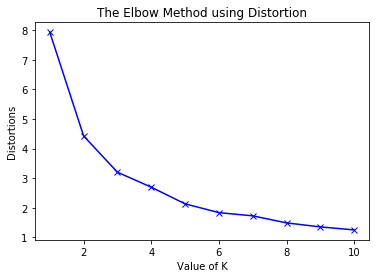

In [125]:
plt.plot(K, distortion, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion')
plt.show()

In [126]:
# set k=4

k=4

k4=KMeans(n_clusters=k, random_state=0).fit(X)

k4.labels_[0:10]

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 1], dtype=int32)

In [127]:
df_neighborhood.insert(4, 'Cluster Label', k4.labels_)

print(df_neighborhood.shape)
df_neighborhood.head()

(53, 25)


,Neighborhood,Borough,Latitude,Longitude,Cluster Label,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Chelsea,Manhattan,40.744035,-74.003116,1,0.527106,0.731189,6.0,28.0,0.214286,...,Bakery,Hotel,Ice Cream Shop,Cycle Studio,Café,Bar,Cupcake Shop,Park,French Restaurant,Nightclub
1,East Village,Manhattan,40.727847,-73.982226,1,0.373654,0.409305,6.0,29.0,0.206897,...,Coffee Shop,Vegetarian / Vegan Restaurant,Speakeasy,Italian Restaurant,Vietnamese Restaurant,Wine Bar,Korean Restaurant,Chinese Restaurant,American Restaurant,Salon / Barbershop
2,Greenwich Village,Manhattan,40.726933,-73.999914,1,0.536995,0.792763,2.0,28.0,0.071429,...,Gym,Dessert Shop,Indian Restaurant,Seafood Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Coffee Shop,Cosmetics Shop,Gourmet Shop,Boutique
3,Lower East Side,Manhattan,40.717807,-73.980890,2,0.398905,0.569328,5.0,18.0,0.277778,...,Art Gallery,Café,Coffee Shop,Clothing Store,Bike Rental / Bike Share,Mediterranean Restaurant,Bubble Tea Shop,Mexican Restaurant,Bus Stop,French Restaurant
4,Tribeca,Manhattan,40.721522,-74.010683,1,0.680028,0.000000,3.0,26.0,0.115385,...,Coffee Shop,American Restaurant,Greek Restaurant,Men's Store,Skate Park,Scenic Lookout,Poke Place,Basketball Court,Bar,Bakery


In [128]:
# Let's check where is Long Island City and its cluster neighbors

df_neighborhood[df_neighborhood['Neighborhood']=='Long Island City']

,Neighborhood,Borough,Latitude,Longitude,Cluster Label,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
34,Long Island City,Queens,40.750217,-73.939202,3,0.278827,0.287766,3.0,7.0,0.428571,...,Mexican Restaurant,Donut Shop,Supermarket,Deli / Bodega,Gym / Fitness Center,Mobile Phone Shop,Cheese Shop,Post Office,Office,General Entertainment


In [137]:
df_neighborhood.loc[df_neighborhood['Cluster Label']==k4.labels_[34], df_neighborhood.columns[[0,1]+list(range(5, 19))]]

,Neighborhood,Borough,Rent: 1 Bedroom,Rent: 2 Bedrooms,Asian Restaurant Counts,Total Restaurant Counts,Asian Restaurant PCT,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
10,Roosevelt Island,Manhattan,0.293661,0.316715,0.0,0.0,0.000000,Deli / Bodega,Park,Monument / Landmark,Scenic Lookout,Gym,Dry Cleaner,Greek Restaurant,Liquor Store,Coffee Shop
31,Red Hook,Brooklyn,0.217199,0.272602,0.0,2.0,0.000000,Seafood Restaurant,Art Gallery,Bar,Park,Ice Cream Shop,Wine Shop,Flower Shop,American Restaurant,Bagel Shop
33,Windsor Terrace,Brooklyn,0.160516,0.261804,1.0,6.0,0.166667,Deli / Bodega,Park,Grocery Store,Diner,Plaza,Middle Eastern Restaurant,Memorial Site,Sushi Restaurant,Chinese Restaurant
34,Long Island City,Queens,0.278827,0.287766,3.0,7.0,0.428571,Hotel,Coffee Shop,Bar,Pizza Place,Café,Mexican Restaurant,Donut Shop,Supermarket,Deli / Bodega
41,Sutton Place,Manhattan,0.402084,0.494888,1.0,1.0,1.000000,Park,Dog Run,Shopping Mall,Spa,Music Store,Italian Restaurant,Liquor Store,Food,Bank


## Visualization

In [133]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

import matplotlib.cm as cm
import matplotlib.colors as colors

In [139]:
geolocator = Nominatim(user_agent="ny_explorer")
latitude=geolocator.geocode('New York City, NY').latitude
longitude=geolocator.geocode('New York City, NY').longitude
map_neighborhoods=folium.Map(location=[latitude, longitude], zoom_start=13)

x=np.arange(k)
ys=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

markers_colors=[]
for lat, lng, neigh, cluster in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'], df_neighborhood['Cluster Label']):
    label=folium.Popup(str(neigh)+'Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker([lat, lng], 
                        radius=5, 
                        popup=label, 
                        color=rainbow[cluster-1], 
                        fill=True, 
                        fill_color=rainbow[cluster-1], 
                        fill_opacity=0.7).add_to(map_neighborhoods)

map_neighborhoods